In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [2]:
df = pd.read_csv(r'D:\data science\data science assg\ass.16 Neural Network\gas_turbines.csv')

In [3]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


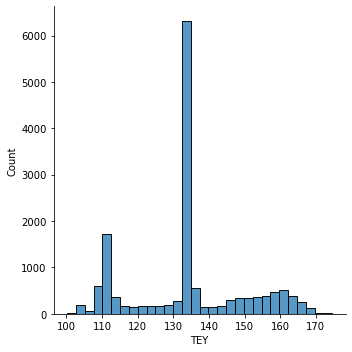

In [5]:
sns.displot(df['TEY'],bins=30)

In [6]:
X = df.drop('TEY',axis=1).values
y =df['TEY'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train.shape

(12031, 10)

In [10]:
model = Sequential()
model.add(Dense(200,input_dim=10, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(1,activation='linear'))

In [11]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])

In [12]:
history=model.fit(X_train,y_train,epochs=100,batch_size=10)

Epoch 1/100
1204/1204 [==============================] - 3s 2ms/step - loss: 12674.2683 - mse: 12674.2683
Epoch 2/100
1204/1204 [==============================] - 3s 2ms/step - loss: 3488.6614 - mse: 3488.6610
Epoch 3/100
1204/1204 [==============================] - 3s 2ms/step - loss: 761.0558 - mse: 761.0558
Epoch 4/100
1204/1204 [==============================] - 2s 2ms/step - loss: 273.7104 - mse: 273.7104
Epoch 5/100
1204/1204 [==============================] - 2s 2ms/step - loss: 251.6522 - mse: 251.6522
Epoch 6/100
1204/1204 [==============================] - 2s 2ms/step - loss: 251.7617 - mse: 251.7617
Epoch 7/100
1204/1204 [==============================] - 3s 2ms/step - loss: 249.5320 - mse: 249.5320
Epoch 8/100
1204/1204 [==============================] - 3s 2ms/step - loss: 255.9496 - mse: 255.9496
Epoch 9/100
1204/1204 [==============================] - 3s 2ms/step - loss: 255.7959 - mse: 255.7959
Epoch 10/100
1204/1204 [==============================] - 2s 2ms/step - loss

1204/1204 [==============================] - 2s 2ms/step - loss: 0.3293 - mse: 0.3293
Epoch 84/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.3575 - mse: 0.3575
Epoch 85/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.4070 - mse: 0.4070
Epoch 86/100
1204/1204 [==============================] - 3s 2ms/step - loss: 0.3399 - mse: 0.3399
Epoch 87/100
1204/1204 [==============================] - 3s 2ms/step - loss: 0.3225 - mse: 0.3225
Epoch 88/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.3415 - mse: 0.3415
Epoch 89/100
1204/1204 [==============================] - 3s 2ms/step - loss: 0.3472 - mse: 0.3472
Epoch 90/100
1204/1204 [==============================] - 3s 2ms/step - loss: 0.3496 - mse: 0.3496
Epoch 91/100
1204/1204 [==============================] - 3s 2ms/step - loss: 0.3474 - mse: 0.3474
Epoch 92/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.3254 - mse: 0.3254
Epoch 93/100
1204/1204 

In [13]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

94/94 [==============================] - 1s 2ms/step - loss: 0.4128 - mse: 0.4128
mse: 41.28%


In [14]:
predictions = model.predict_classes(X_test)
predictions

C:\Users\91832\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

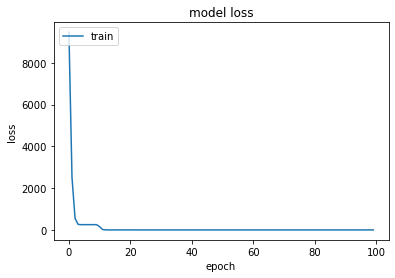

In [15]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
